
# **Amazon Rainforest Fire Data Analysis**

## **Introduction**

The Amazon Rainforest, often referred to as the "lungs of the Earth," has been experiencing increasingly frequent and intense forest fires in recent years. Understanding the patterns of these fires is critical for addressing the environmental and ecological impacts. In this project, we analyze data related to forest fires in Brazil, focusing on the Amazon region. The dataset reports the number of forest fires in different states of Brazil, recorded from 1998 to 2017. This analysis aims to uncover trends, identify the months, years, and states most affected by fires, and gain insights that can inform future conservation efforts.

The dataset includes the following columns:
- **year**: The year in which the fire data was recorded.
- **state**: The state of Brazil where the fires occurred.
- **month**: The month of the year when the fires were recorded.
- **number**: The number of forest fires reported.
- **date**: The exact date of the reported fire.

## **Dataset Overview**

The dataset contains 6454 rows and 5 columns. The data spans from 1998 to 2017, providing a decade-long insight into forest fire occurrences in various Brazilian states, particularly the Amazon.

# Import Libraries & Data Load

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try with 'ISO-8859-1' encoding
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Python Project/Amazon Rainforest Fire Data Analysis/amazon.csv', encoding='ISO-8859-1')

In [30]:
# Display the first few rows of the dataset
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# Basic Information and Data Preprocessing

In [31]:
# Display Top 5 Rows of the Dataset
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [32]:
# Display Last 5 Rows of the Dataset
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [33]:
# Get number of rows and columns
df.shape

(6454, 5)

In [34]:
# Get detailed info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [35]:
# Rename Month Names to English
month_translation = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}

df['month'] = df['month'].map(month_translation)

In [36]:
# Check for duplicates and remove them
df.drop_duplicates(inplace=True)


In [37]:
# Check for null values in the dataset
df.isnull().sum()

,0
year,0
state,0
month,0
number,0
date,0


# Exploratory Data Analysis (EDA)

**Overall Statistics**

In [38]:
# Get overall statistics about the dataset
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


**Monthly Forest Fires Analysis**

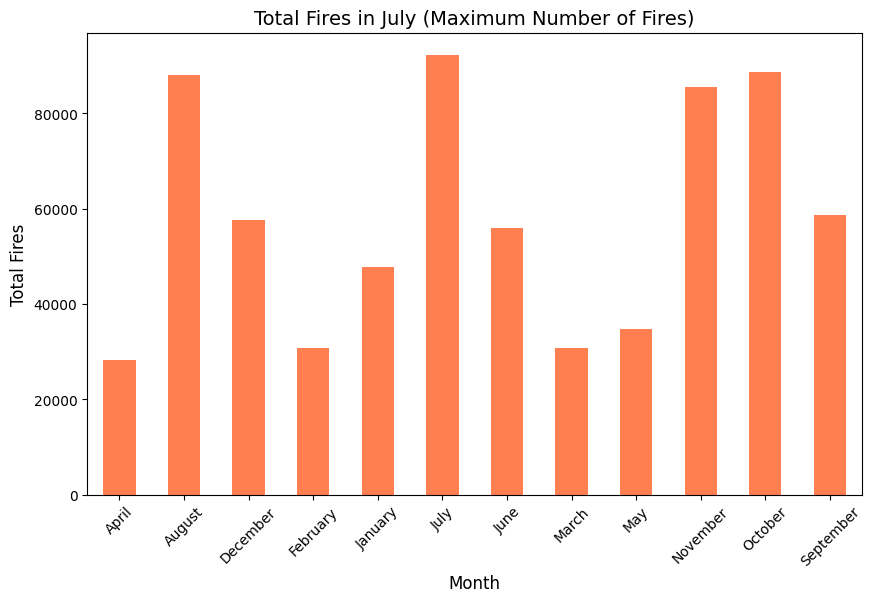

('July', 92319.113)

In [39]:
# Group by month and sum the number of fires
monthly_fires = df.groupby('month')['number'].sum()

# Find the month with the maximum fires
max_month = monthly_fires.idxmax()
max_fires = monthly_fires[max_month]

# Visualization of the monthly fires
plt.figure(figsize=(10, 6))
monthly_fires.plot(kind='bar', color='coral')
plt.title(f"Total Fires in {max_month} (Maximum Number of Fires)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Fires", fontsize=12)
plt.xticks(rotation=45)
plt.show()

max_month, max_fires


**Yearly Forest Fires Analysis**

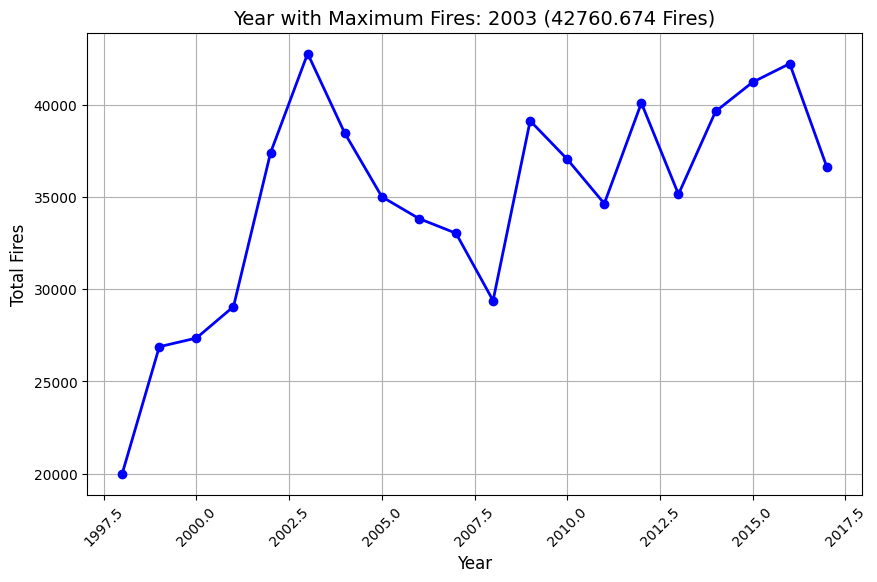

(2003, 42760.674)

In [40]:
# Group by year and sum the number of fires
yearly_fires = df.groupby('year')['number'].sum()

# Find the year with the maximum fires
max_year = yearly_fires.idxmax()
max_year_fires = yearly_fires[max_year]

# Visualization of the yearly fires
plt.figure(figsize=(10, 6))
yearly_fires.plot(kind='line', color='b', marker='o', linewidth=2)
plt.title(f"Year with Maximum Fires: {max_year} ({max_year_fires} Fires)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Fires", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

max_year, max_year_fires

# Regional Fire Analysis

**State with the Maximum Number of Fires**

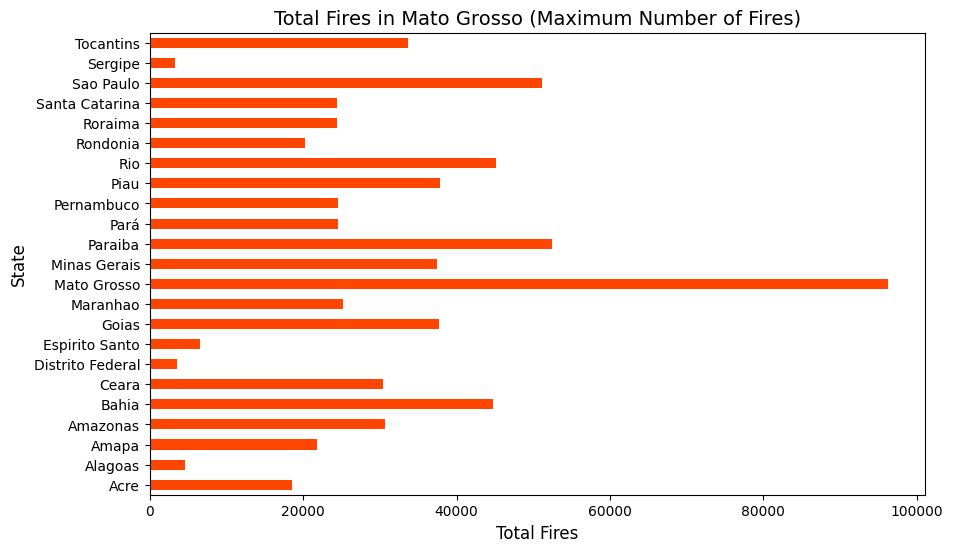

('Mato Grosso', 96246.028)

In [41]:
# Group by state and sum the number of fires
state_fires = df.groupby('state')['number'].sum()

# Find the state with the maximum fires
max_state = state_fires.idxmax()
max_state_fires = state_fires[max_state]

# Visualization of the state-wise fires with different color
plt.figure(figsize=(10, 6))
state_fires.plot(kind='barh', color='orangered')
plt.title(f"Total Fires in {max_state} (Maximum Number of Fires)", fontsize=14)
plt.xlabel("Total Fires", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()

max_state, max_state_fires

**Amazonas Fire Report (Year-Wise Analysis)**

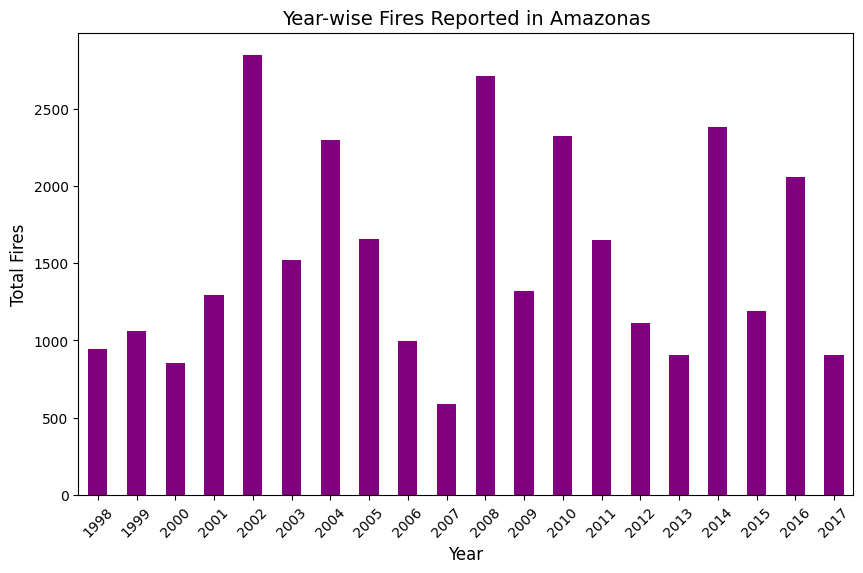

,number
year,
1998,946.000
1999,1061.000
2000,853.000
2001,1297.000
2002,2852.000
2003,1524.268
2004,2298.207
2005,1657.128
2006,997.640


In [42]:
# Filter data for Amazonas
amazonas_fires = df[df['state'] == 'Amazonas']

# Group by year and sum the number of fires
amazonas_year_fires = amazonas_fires.groupby('year')['number'].sum()

# Visualization of Amazonas fire data year-wise
plt.figure(figsize=(10, 6))
amazonas_year_fires.plot(kind='bar', color='purple')
plt.title("Year-wise Fires Reported in Amazonas", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Fires", fontsize=12)
plt.xticks(rotation=45)
plt.show()

amazonas_year_fires

**Amazonas Fire Report (Month-Wise)**

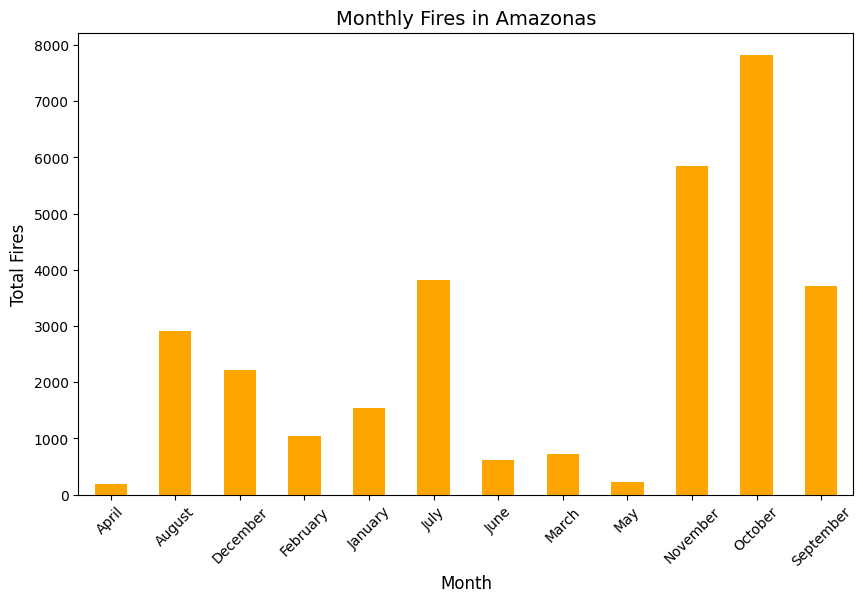

,number
month,
April,192.000
August,2900.974
December,2224.000
February,1047.000
January,1531.000
July,3809.112
June,618.000
March,728.000
May,219.000


In [47]:
# Group by month and sum the number of fires
amazonas_month_fires = amazonas_fires.groupby('month')['number'].sum()

# Visualization of Amazonas fire data month-wise
plt.figure(figsize=(10, 6))
amazonas_month_fires.plot(kind='bar', color='orange')
plt.title("Monthly Fires in Amazonas", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Fires", fontsize=12)
plt.xticks(rotation=45)
plt.show()

amazonas_month_fires

# Special Investigations

**Fires Reported in December (State-Wise)**

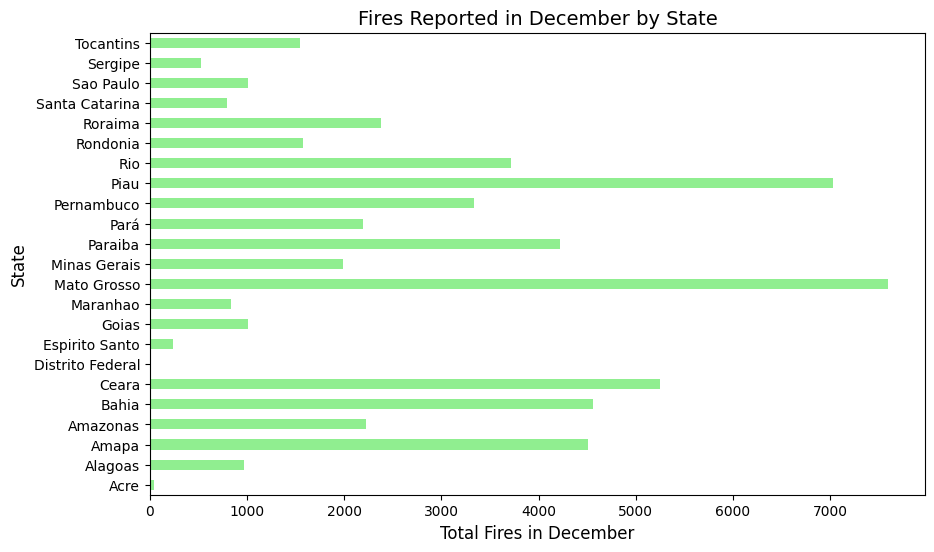

,number
state,
Acre,47.000
Alagoas,964.000
Amapa,4504.000
Amazonas,2224.000
Bahia,4559.408
Ceara,5251.183
Distrito Federal,5.000
Espirito Santo,239.000
Goias,1007.000


In [44]:
# Filter data for December month
december_fires = df[df['month'] == 'December']

# Group by state and sum the number of fires in December
december_state_fires = december_fires.groupby('state')['number'].sum()

# Visualization of December fires by state
plt.figure(figsize=(10, 6))
december_state_fires.plot(kind='barh', color='lightgreen')
plt.title("Fires Reported in December by State", fontsize=14)
plt.xlabel("Total Fires in December", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.show()

december_state_fires

**Fires in 2015 (Month-Wise Visualization)**

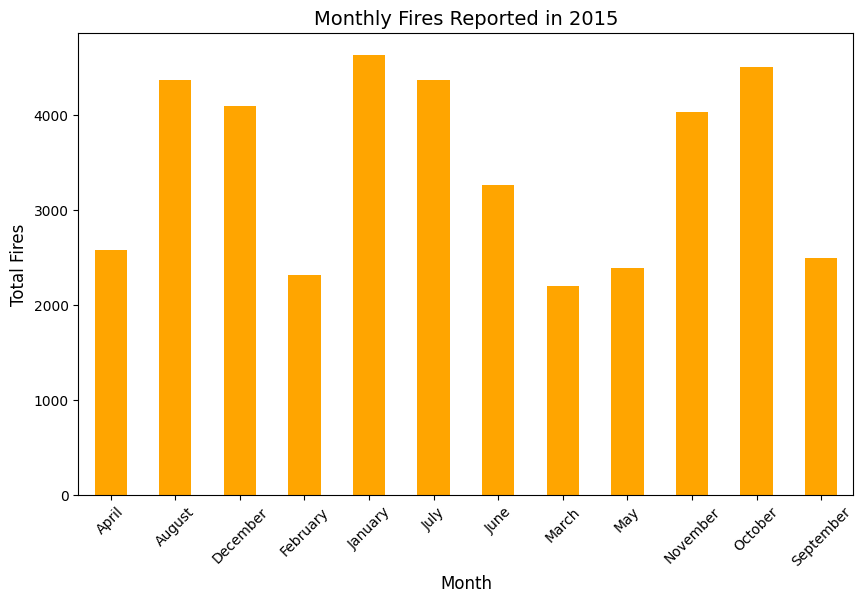

,number
month,
April,2573.000
August,4363.125
December,4088.522
February,2309.000
January,4635.000
July,4364.392
June,3260.552
March,2202.000
May,2384.000


In [45]:
# Filter data for the year 2015
fires_2015 = df[df['year'] == 2015]

# Group by month and sum the number of fires
fires_2015_monthly = fires_2015.groupby('month')['number'].sum()

# Visualization of 2015 monthly fires
plt.figure(figsize=(10, 6))
fires_2015_monthly.plot(kind='bar', color='orange')
plt.title("Monthly Fires Reported in 2015", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Fires", fontsize=12)
plt.xticks(rotation=45)
plt.show()

fires_2015_monthly

**Average Fires Reported (State-Wise, Highest to Lowest)**

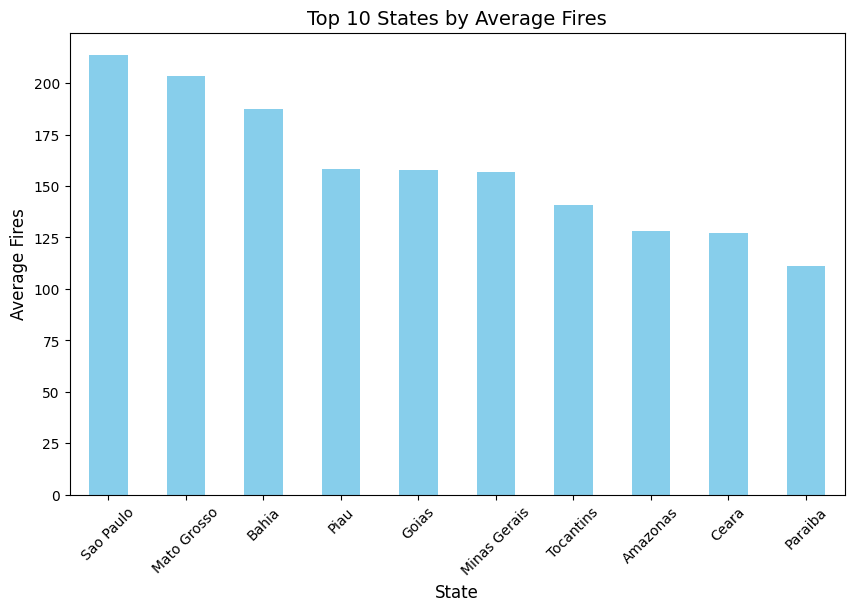

,number
state,
Sao Paulo,213.896226
Mato Grosso,203.479975
Bahia,187.222703
Piau,158.174674
Goias,157.721841
Minas Gerais,156.800243
Tocantins,141.037176
Amazonas,128.243218
Ceara,127.314071


In [46]:
# Group by state and calculate the average number of fires
state_avg_fires = df.groupby('state')['number'].mean().sort_values(ascending=False)

# Visualization of top 10 states by average fires
plt.figure(figsize=(10, 6))
state_avg_fires.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 States by Average Fires", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Average Fires", fontsize=12)
plt.xticks(rotation=45)
plt.show()

state_avg_fires.head(10)

## **Conclusion**

The Amazon Rainforest fire data analysis has provided crucial insights into the occurrence of forest fires in Brazil, with a particular focus on the Amazon region. The main findings include:

1. **Month with Maximum Fires**: We identified the month with the highest total number of fires, providing valuable insight into seasonal fire trends.
2. **Year with Maximum Fires**: The analysis of yearly trends revealed which year had the highest occurrence of fires, helping to understand peak fire seasons.
3. **State with Maximum Fires**: By focusing on state-wise fire occurrences, we identified Amazonas as the region with the most fires, emphasizing the need for more attention in this area.
4. **Year-wise Analysis for Amazonas**: The year-wise distribution of fires in Amazonas revealed significant trends in fire occurrences over time.
5. **Monthly Analysis for 2015**: A breakdown of fires by month in 2015 provided insight into when fires were most concentrated during that year.
6. **Average Fires by State**: The analysis of average fires by state revealed the top states most frequently affected by forest fires.

These insights are crucial for understanding the patterns and impacts of forest fires in Brazil. The visualization and analysis provide a foundation for further research, including investigating the causes behind the trends observed. The results can help inform policy decisions aimed at controlling and reducing the frequency of forest fires in the Amazon region, which is vital for preserving the rainforest and mitigating climate change.